## Linear Regression Practice with Cars Data : Lab 13

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## View the data from the dataset by pandas

In [36]:
cars_df = pd.read_csv("kaggle/car_data.csv")
cars_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## View the first five rows.

In [37]:
cars_milage =cars_df[["Car_Name","Kms_Driven"]].head(5)
cars_milage

,Car_Name,Kms_Driven
0,ritz,27000
1,sx4,43000
2,ciaz,6900
3,wagon r,5200
4,swift,42450


## View the description of the dataset.

In [38]:
cars_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## View the info of a dataset.

In [39]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## By using Regression module, split the data into train & tests.

In [68]:
X = cars_df["Car_Name"].values
y = cars_df["Kms_Driven"].values
X,y

(array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 'ciaz',
        's cross', 'ciaz', 'ciaz', 'alto 800', 'ciaz', 'ciaz', 'ertiga',
        'dzire', 'ertiga', 'ertiga', 'ertiga', 'wagon r', 'sx4',
        'alto k10', 'ignis', 'sx4', 'alto k10', 'wagon r', 'swift',
        'swift', 'swift', 'alto k10', 'ciaz', 'ritz', 'ritz', 'swift',
        'ertiga', 'dzire', 'sx4', 'dzire', '800', 'alto k10', 'sx4',
        'baleno', 'alto k10', 'sx4', 'dzire', 'omni', 'ciaz', 'ritz',
        'wagon r', 'ertiga', 'ciaz', 'fortuner', 'fortuner', 'innova',
        'fortuner', 'innova', 'corolla altis', 'etios cross',
        'corolla altis', 'etios g', 'fortuner', 'corolla altis',
        'etios cross', 'fortuner', 'fortuner', 'fortuner', 'etios liva',
        'innova', 'fortuner', 'corolla altis', 'corolla altis',
        'etios liva', 'corolla altis', 'corolla altis', 'etios liva',
        'etios cross', 'etios g', 'corolla altis', 'corolla',
        'corolla altis', 'fortuner', 'cor

In [69]:
X = X.reshape(-1,1)
X

array([['ritz'],
       ['sx4'],
       ['ciaz'],
       ['wagon r'],
       ['swift'],
       ['vitara brezza'],
       ['ciaz'],
       ['s cross'],
       ['ciaz'],
       ['ciaz'],
       ['alto 800'],
       ['ciaz'],
       ['ciaz'],
       ['ertiga'],
       ['dzire'],
       ['ertiga'],
       ['ertiga'],
       ['ertiga'],
       ['wagon r'],
       ['sx4'],
       ['alto k10'],
       ['ignis'],
       ['sx4'],
       ['alto k10'],
       ['wagon r'],
       ['swift'],
       ['swift'],
       ['swift'],
       ['alto k10'],
       ['ciaz'],
       ['ritz'],
       ['ritz'],
       ['swift'],
       ['ertiga'],
       ['dzire'],
       ['sx4'],
       ['dzire'],
       ['800'],
       ['alto k10'],
       ['sx4'],
       ['baleno'],
       ['alto k10'],
       ['sx4'],
       ['dzire'],
       ['omni'],
       ['ciaz'],
       ['ritz'],
       ['wagon r'],
       ['ertiga'],
       ['ciaz'],
       ['fortuner'],
       ['fortuner'],
       ['innova'],
       ['fortuner'],
   

In [70]:
y

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  43000,
        41678,  43000,  35500,  41442,  25000,   2400,  50000,  45280,
        56879,  20000,  55138,  16200,  44542,  45000,  51439,  54200,
        39000,  45000,  45000,  49998,  48767, 127000,  10079,  62000,
        24524,  46706,  58000,  45780,  50000,  15000,  64532,  65000,
        25870,  37000, 104707,  40000,  15000, 135000,  90000,  70000,
        40534,  50000,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  45000,  11000,  59000,  88000,  12000,  71000,  45000,
        56001,  43000,  83000,  36000,  72000, 135154,  80000,  89000,
        23000,  40000,  15000,  38000, 197176, 142000,  78000,  56000,
        47000,  40000,  62000,  58242,  75000,  40000,  89000,  72000,
        29000,   8700,  45000,  50024,   3000,   1400,   4000,   1200,
         4100,  21700,  16500,  15000,  18000,  11000,   6000,   8700,
      

## Fit your training split to the regression model.

In [54]:
X = cars_df["Car_Name"].values.reshape(-1,1)
Y = cars_df["Kms_Driven"].values

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.6,test_size=0.4,random_state=20)


In [67]:
model = LinearRegression()
model.fit(x_train,y_train)

In [61]:
y_predict = model.predict(x_test)
y_predict

In [62]:
print(f"Train accuracy is {float(model.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy is {float(model.score(x_test,y_test)*100,2)} %")

## Draw at least three conclusions from your regression model.

Text(0.5, 1.0, 'Car Kilometers')

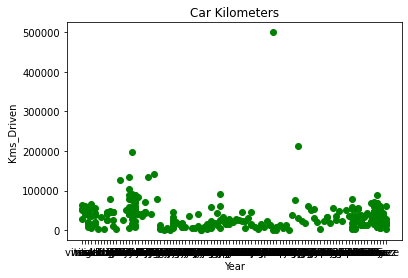

In [66]:
%matplotlib inline
plt.scatter(x,y,color='green')
plt.xlabel('Year')
plt.ylabel('Kms_Driven')
plt.title('Car Kilometers')

In [63]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_predict, color='red')
plt.xlabel("Kms_Driven")
plt.ylabel("Year")
plt.title("Trained model plot")